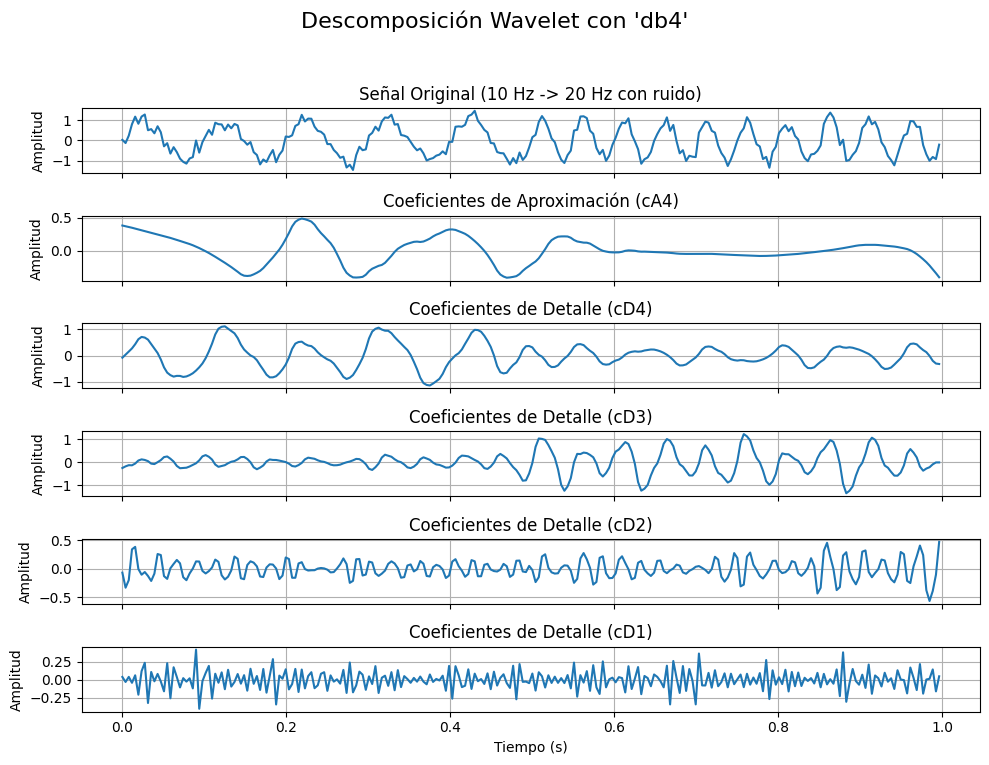

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# 1. Generar una señal de ejemplo
# Simularemos una señal que cambia de frecuencia a la mitad del tiempo.
# Esto es similar a cómo un ritmo cerebral puede cambiar durante una tarea.
sampling_frequency = 256  # Frecuencia de muestreo en Hz (típica para EEG)
t = np.linspace(0, 1.0, sampling_frequency, endpoint=False) # Vector de tiempo de 1 segundo

# Primera mitad: señal de 10 Hz (ritmo Alfa)
y1 = np.sin(10 * 2 * np.pi * t[:sampling_frequency//2])
# Segunda mitad: señal de 20 Hz (ritmo Beta)
y2 = np.sin(20 * 2 * np.pi * t[sampling_frequency//2:])

signal = np.concatenate([y1, y2])

# Añadir un poco de ruido para hacerla más realista
noise = 0.2 * np.random.randn(len(signal))
signal = signal + noise

# 2. Realizar la Transformada Wavelet Discreta (DWT)
# Elegimos la wavelet madre 'db4', común en análisis de EEG.[2, 3]
wavelet_madre = 'db4'
# Descomponemos la señal en 4 niveles.
# Esto nos dará coeficientes que se correlacionan con las bandas de EEG.
niveles = 4
coeffs = pywt.wavedec(signal, wavelet_madre, level=niveles)

# Los coeficientes son una lista:
# cA: Coeficientes de Aproximación (baja frecuencia)
# cD: Coeficientes de Detalle (alta frecuencia)
cA4, cD4, cD3, cD2, cD1 = coeffs

# 3. Visualizar los resultados
fig, axs = plt.subplots(len(coeffs) + 1, 1, figsize=(10, 8), sharex=True)
fig.suptitle(f"Descomposición Wavelet con '{wavelet_madre}'", fontsize=16)

# --- CORRECCIÓN AQUÍ ---
# Graficar la señal original en el primer subplot (índice 0)
axs[0].plot(t, signal)
axs[0].set_title("Señal Original (10 Hz -> 20 Hz con ruido)")
axs[0].set_ylabel("Amplitud")
axs[0].grid(True)

# Graficar los coeficientes
for i, coeff in enumerate(coeffs):
    # El primer coeficiente es la aproximación, el resto son detalles
    if i == 0:
        title = f"Coeficientes de Aproximación (cA{niveles})"
    else:
        title = f"Coeficientes de Detalle (cD{niveles - i + 1})"
    
    # Reconstrucción de la componente de la señal para graficarla en la misma escala de tiempo
    # Creamos una lista de coeficientes con ceros excepto el actual
    coeff_list = [np.zeros_like(c) for c in coeffs]
    coeff_list[i] = coeff
    reconstructed_signal = pywt.waverec(coeff_list, wavelet_madre)
    
    # Asegurarse de que la señal reconstruida tenga la misma longitud que el tiempo
    reconstructed_signal = reconstructed_signal[:len(t)]

    # --- CORRECCIÓN AQUÍ ---
    # Graficar cada componente en su subplot correspondiente (índice i+1)
    axs[i+1].plot(t, reconstructed_signal)
    axs[i+1].set_title(title)
    axs[i+1].set_ylabel("Amplitud")
    axs[i+1].grid(True)

axs[-1].set_xlabel("Tiempo (s)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [2]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 11.3 MB/s eta 0:00:00MB/s eta 0:00:01

[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: pip install --upgrade pip
